<a href="https://colab.research.google.com/github/verykurniabakti/cv/blob/master/percobaan3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -----  Exploratory Data Analysis (EDA) ----
# --- Statistik deskriptif ----
# Rata rata (mean)
# Simpangan Baku (std)
# min, max, kuartil (Q1), median Q3
import pandas as pd

df = pd.read_csv("data_ka_siap.csv")
desc = df.describe()
print(desc)


               ax          ay          az          gx          gy          gz  \
count  493.000000  493.000000  493.000000  493.000000  493.000000  493.000000   
mean     0.035070    0.011542    0.456842   -1.450628   -0.805471   -0.158235   
std      0.172572    0.175139    0.604551    1.434549    0.794939    0.355722   
min     -1.431792   -1.139700   -1.040355   -3.244275   -1.854962   -1.600390   
25%      0.003111    0.004941   -0.007869   -2.854962   -1.580153   -0.335878   
50%      0.077531    0.018799    0.953369   -2.641221   -1.343511   -0.213740   
75%      0.083984    0.022705    0.961914   -0.000722   -0.003000   -0.000207   
max      1.279719    1.344745    1.213046    0.474516    1.124521    1.988325   

            label  
count  493.000000  
mean     0.492901  
std      0.500457  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


In [2]:
# --- distribusi kelas ---
# Seberapa seimbang kelas 0 dan 1
df['label'].value_counts(normalize=True)

,proportion
label,
0,0.507099
1,0.492901


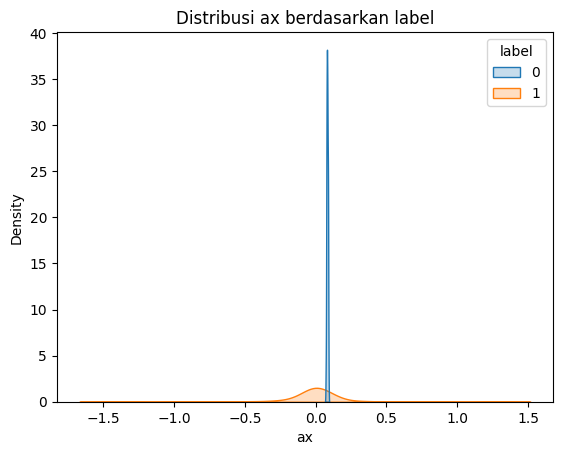

In [3]:
# --- Visualisasi ---
# Histogram atau KDE plot untuk melihat distribusi fitur.
# Boxplot untuk mendeteksi outlier.
# Pairplot untuk korelasi dan separabilitas antar fitur per kelas.
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df, x="ax", hue="label", fill=True)
plt.title("Distribusi ax berdasarkan label")
plt.show()


<Axes: >

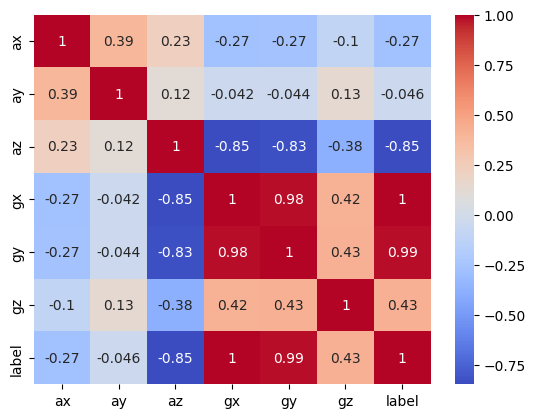

In [4]:
# --- korelasi antar fitur --- korelasi pearson
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")


In [5]:
import pandas as pd

df = pd.read_csv("data_ka_siap.csv")
print(df.shape)
print(df.head())


(493, 7)
         ax        ay        az        gx        gy        gz  label
0 -0.078629 -0.072346  0.328973 -0.030680 -0.117878 -0.096649      1
1  0.027023  0.135176  0.212524 -0.082713  0.010752  0.040630      1
2  0.127246  0.040870 -0.545340 -0.049066  0.074546  0.170800      1
3  0.009516  0.053802 -0.926224 -0.057500  0.105462 -0.438776      1
4 -0.006466  0.918721  0.430050 -0.146734  0.144089  0.588326      1


In [6]:
desc = df.describe()
print(desc)


               ax          ay          az          gx          gy          gz  \
count  493.000000  493.000000  493.000000  493.000000  493.000000  493.000000   
mean     0.035070    0.011542    0.456842   -1.450628   -0.805471   -0.158235   
std      0.172572    0.175139    0.604551    1.434549    0.794939    0.355722   
min     -1.431792   -1.139700   -1.040355   -3.244275   -1.854962   -1.600390   
25%      0.003111    0.004941   -0.007869   -2.854962   -1.580153   -0.335878   
50%      0.077531    0.018799    0.953369   -2.641221   -1.343511   -0.213740   
75%      0.083984    0.022705    0.961914   -0.000722   -0.003000   -0.000207   
max      1.279719    1.344745    1.213046    0.474516    1.124521    1.988325   

            label  
count  493.000000  
mean     0.492901  
std      0.500457  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


In [7]:
label_counts = df['label'].value_counts()
label_ratio = df['label'].value_counts(normalize=True)
print(label_counts)
print(label_ratio)


label
0    250
1    243
Name: count, dtype: int64
label
0    0.507099
1    0.492901
Name: proportion, dtype: float64


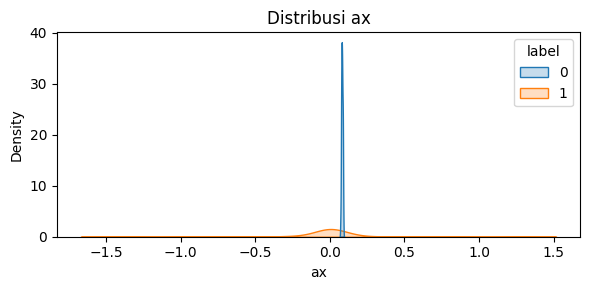

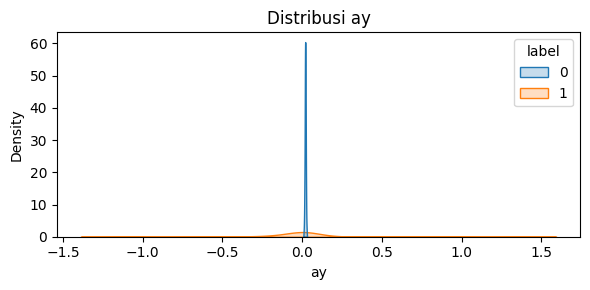

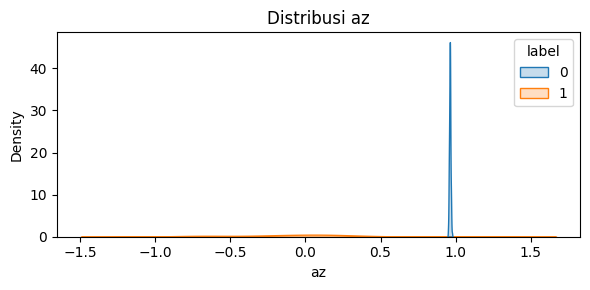

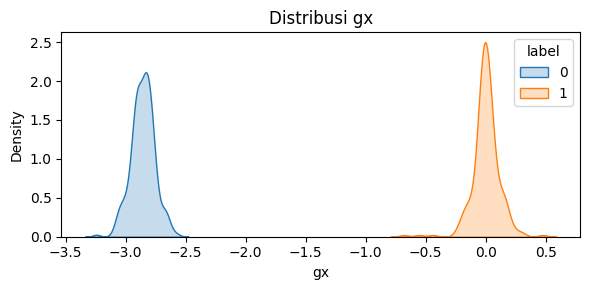

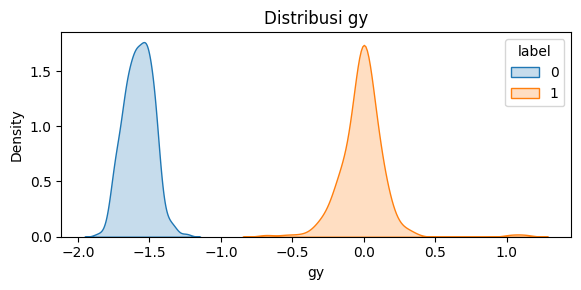

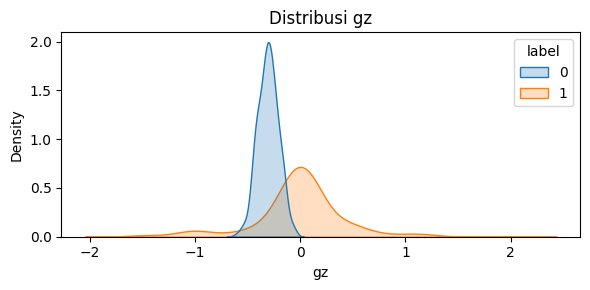

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
for f in features:
    plt.figure(figsize=(6,3))
    sns.kdeplot(data=df, x=f, hue='label', fill=True)
    plt.title(f'Distribusi {f}')
    plt.tight_layout()
    plt.show()


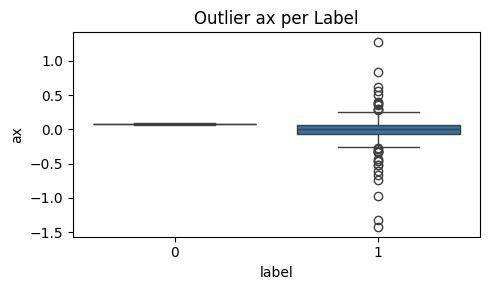

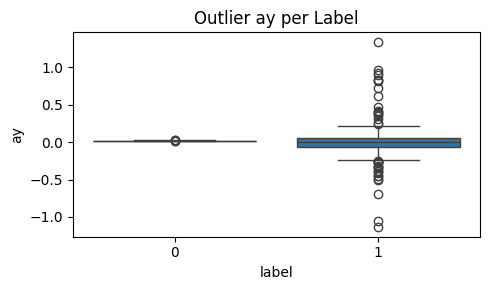

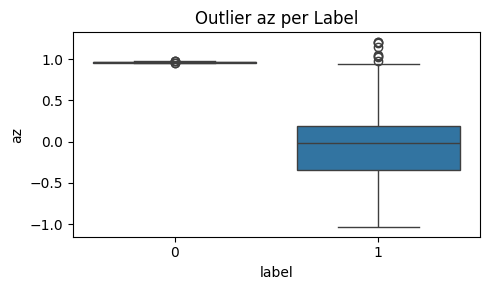

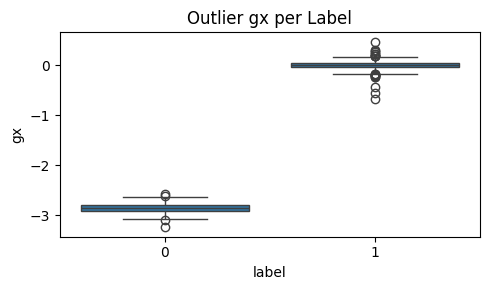

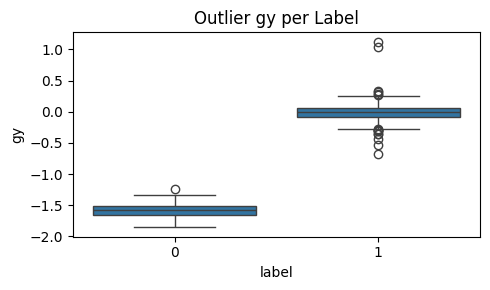

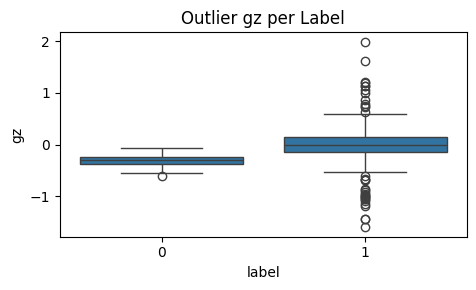

In [9]:
for f in features:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x='label', y=f)
    plt.title(f'Outlier {f} per Label')
    plt.tight_layout()
    plt.show()


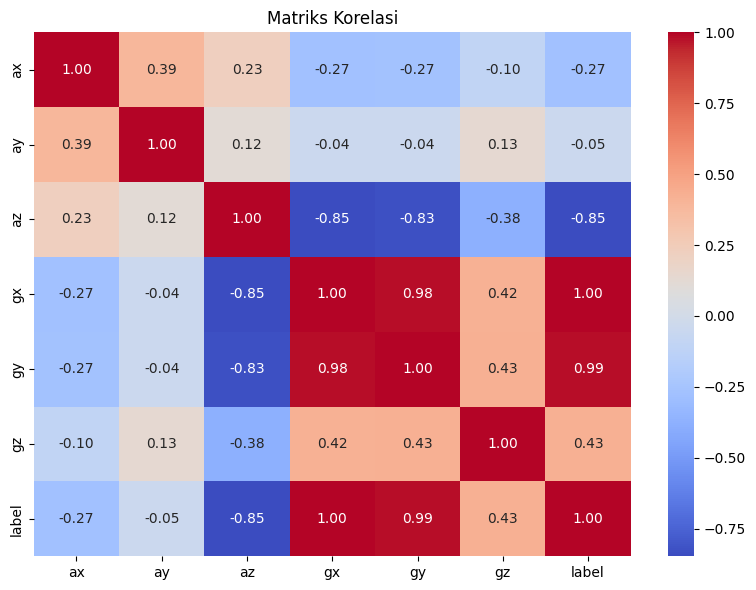

In [10]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.tight_layout()
plt.show()


In [11]:
from scipy.stats import ttest_ind

for f in features:
    group0 = df[df['label'] == 0][f]
    group1 = df[df['label'] == 1][f]
    stat, p = ttest_ind(group0, group1, equal_var=False)
    print(f"{f}: p-value = {p:.5f}")


ax: p-value = 0.00000
ay: p-value = 0.31168
az: p-value = 0.00000
gx: p-value = 0.00000
gy: p-value = 0.00000
gz: p-value = 0.00000


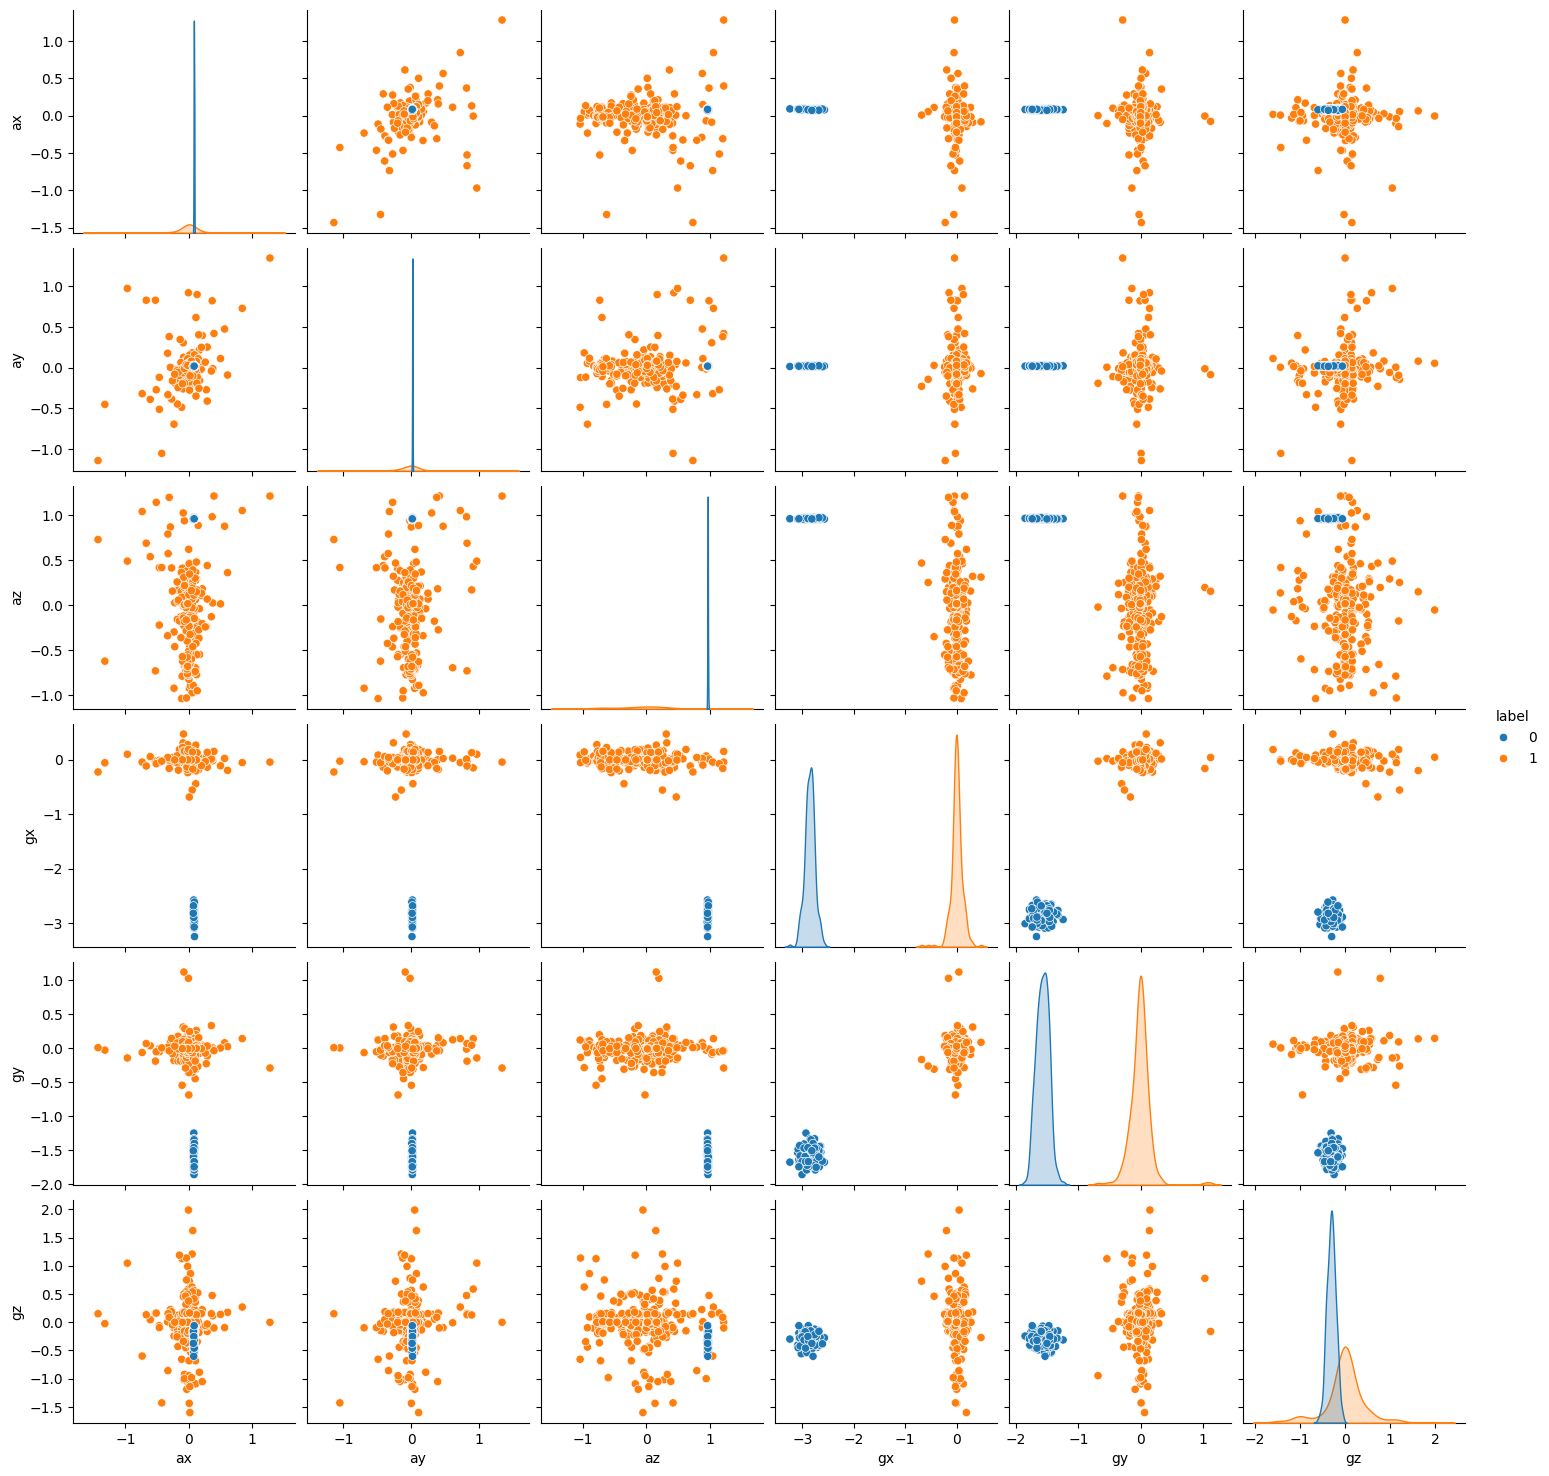

In [12]:
import seaborn as sns

sns.pairplot(df, hue='label', vars=features)
plt.show()


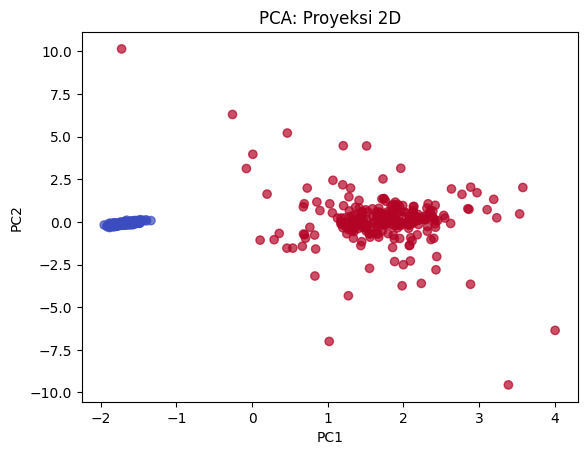

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[features]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['label'], cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Proyeksi 2D')
plt.show()
